In [1]:
boston <- read.table("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", 
                     header = FALSE, sep = "")
names(boston) <- c("CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE","DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT",
                   "MEDV")

In [16]:

install.packages('moments')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [17]:

library(moments)
stats = data.frame(feature=colnames(boston))
stats['mean_'] = sapply(boston, mean)
stats['sd_'] = sapply(boston, sd)
stats['skewness_'] = sapply(boston, skewness)
stats['kurtosis_'] = sapply(boston, kurtosis)
stats

feature,mean_,sd_,skewness_,kurtosis_
CRIM,3.61352356,8.6015451,5.2076524,39.752786
ZN,11.36363636,23.3224530,2.2190631,6.979949
INDUS,11.13677866,6.8603529,0.2941463,1.766782
CHAS,0.06916996,0.2539940,3.3957993,12.531453
NOX,0.55469506,0.1158777,0.7271442,2.924136
RM,6.28463439,0.7026171,0.4024147,4.861027
AGE,68.57490119,28.1488614,-0.5971856,2.029986
DIS,3.79504269,2.1057101,1.0087788,3.471299
RAD,9.54940711,8.7072594,1.0018335,2.129479
TAX,408.23715415,168.5371161,0.6679683,1.857015


In [18]:
boston_sc <- data.frame(scale(boston))

In [19]:
stats_sc = data.frame(feature=colnames(boston_sc))
stats_sc['mean_'] = sapply(boston_sc, mean)
stats_sc['sd_'] = sapply(boston_sc, sd)
stats_sc['skewness_'] = sapply(boston_sc, skewness)
stats_sc['kurtosis_'] = sapply(boston_sc, kurtosis)
stats_sc

feature,mean_,sd_,skewness_,kurtosis_
CRIM,-7.202981e-18,1,5.2076524,39.752786
ZN,2.282481e-17,1,2.2190631,6.979949
INDUS,1.595296e-17,1,0.2941463,1.766782
CHAS,-3.544441e-18,1,3.3957993,12.531453
NOX,-2.150022e-16,1,0.7271442,2.924136
RM,-1.056462e-16,1,0.4024147,4.861027
AGE,-1.643357e-16,1,-0.5971856,2.029986
DIS,1.153079e-16,1,1.0087788,3.471299
RAD,4.799652e-17,1,1.0018335,2.129479
TAX,2.024415e-17,1,0.6679683,1.857015


In [28]:

library(ggplot2)
library(repr)
options(repr.plot.width=10, repr.plot.height=2)

In [29]:
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [30]:
original_v_scaled <- function (feature) {
    original_feature <- as.vector(boston[[feature]])
    scaled_feature <- as.vector(boston_sc[[feature]])
    p1 <- qplot(original_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(original_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(original_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Original Distribution of", feature))
    p2 <- qplot(scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Scaled Distribution of", feature))  
    multiplot(p1, p2, cols=2)
}


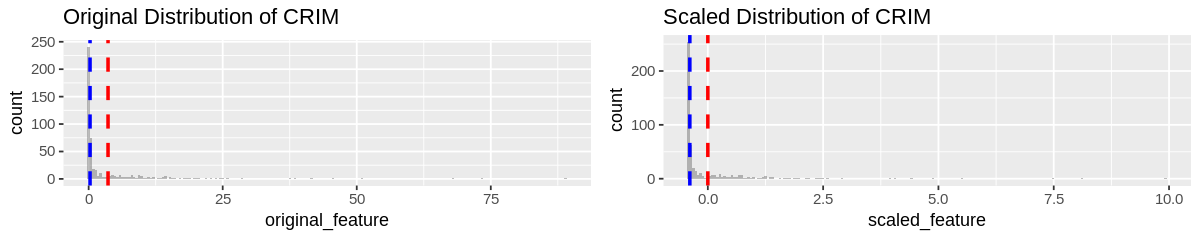

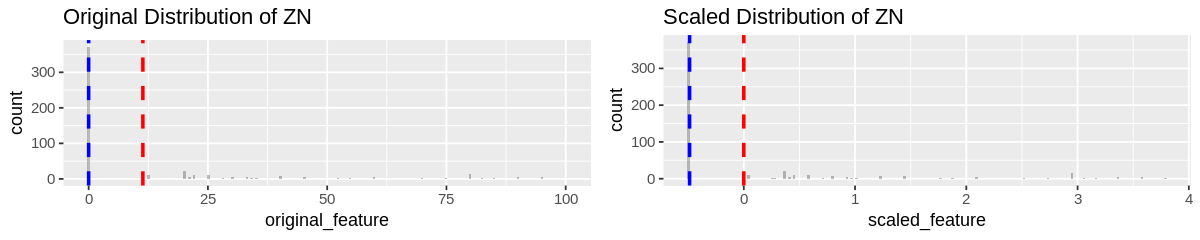

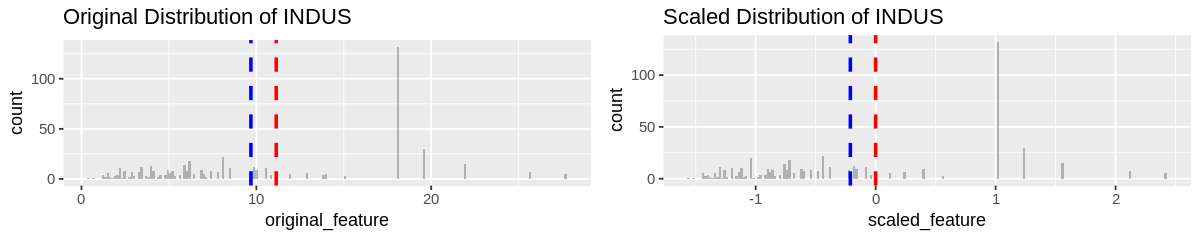

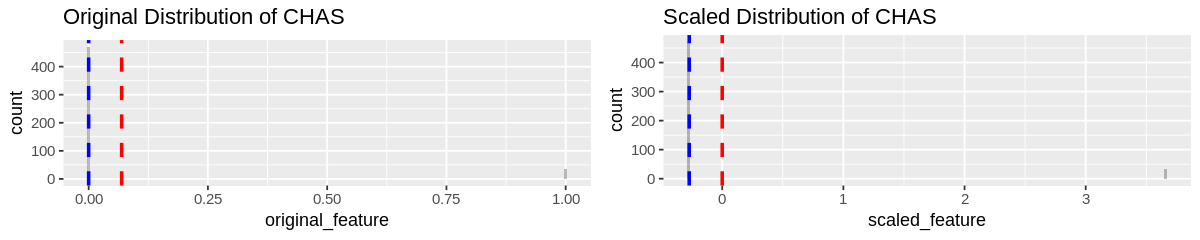

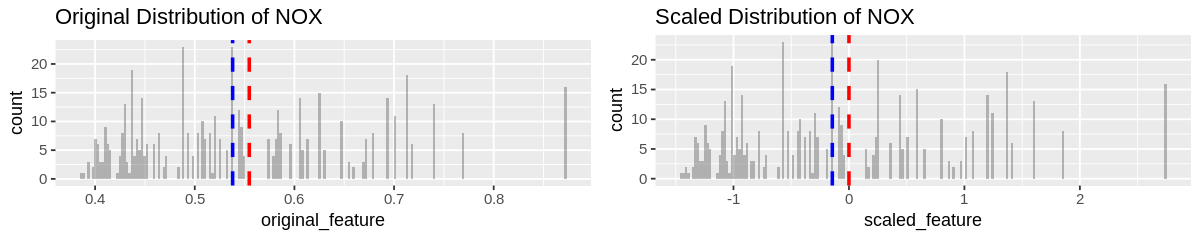

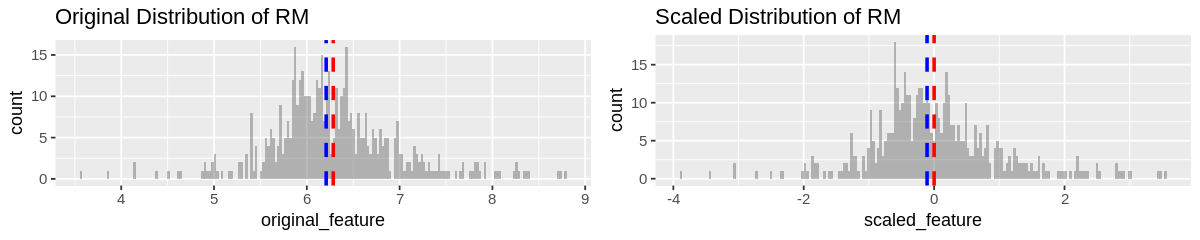

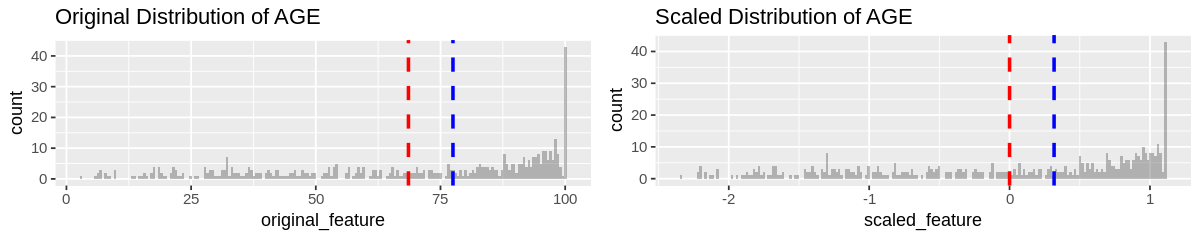

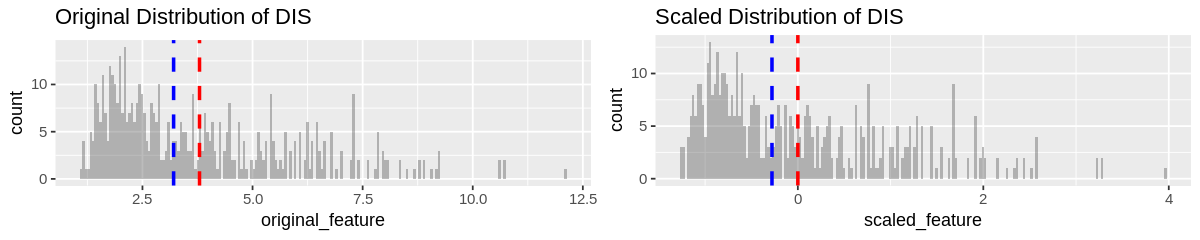

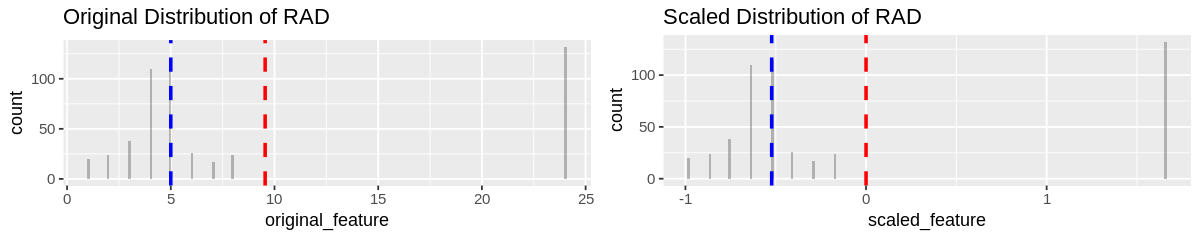

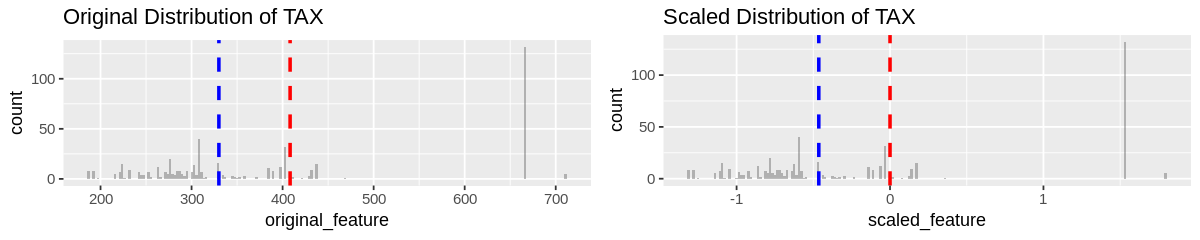

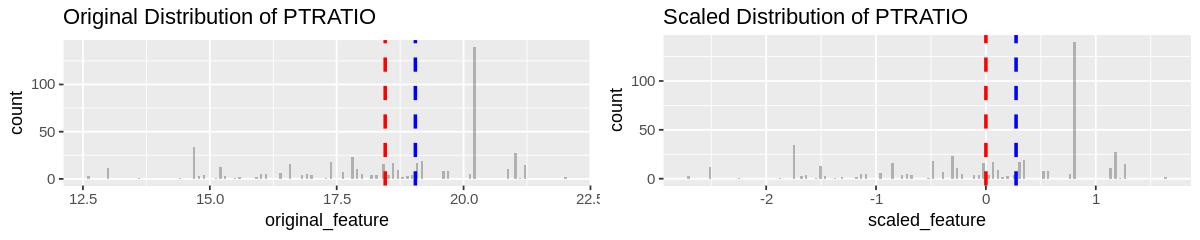

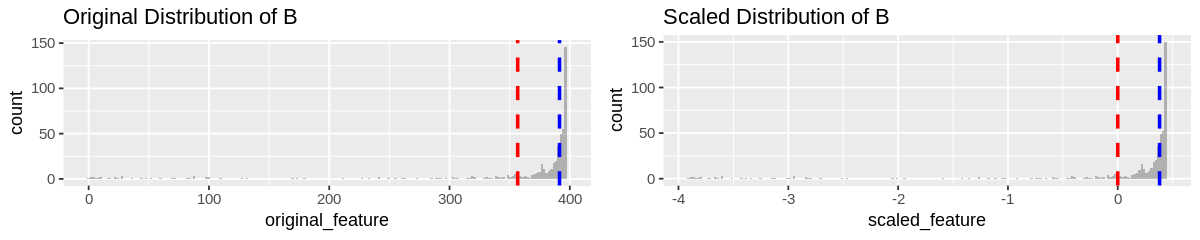

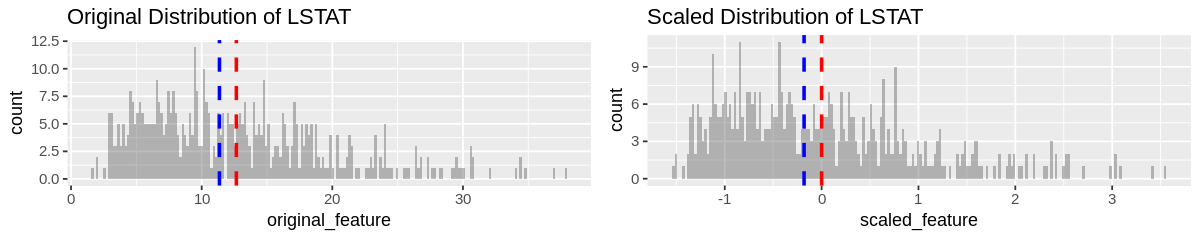

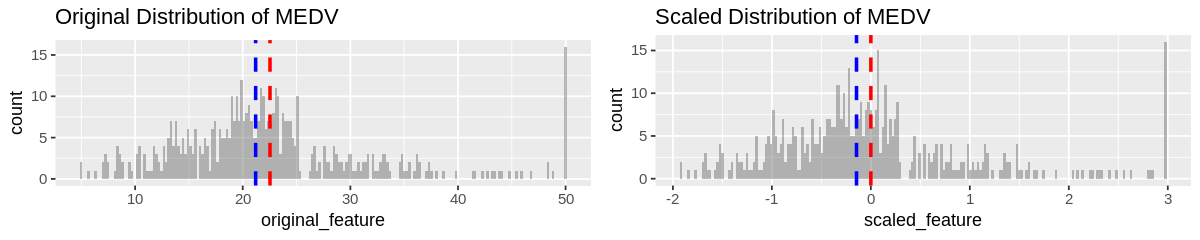

In [31]:
original_v_scaled('CRIM')
original_v_scaled('ZN')
original_v_scaled('INDUS')
original_v_scaled('CHAS')
original_v_scaled('NOX')
original_v_scaled('RM')
original_v_scaled('AGE')
original_v_scaled('DIS')
original_v_scaled('RAD')
original_v_scaled('TAX')
original_v_scaled('PTRATIO')
original_v_scaled('B')
original_v_scaled('LSTAT')
original_v_scaled('MEDV')

*deskew*


In [32]:
skewness_ = data.frame(feature=colnames(boston_sc))
skewness_['skew_'] = sapply(boston, skewness)
skewness_['skew_sc'] = sapply(boston_sc, skewness)
skewness_

feature,skew_,skew_sc
CRIM,5.2076524,5.2076524
ZN,2.2190631,2.2190631
INDUS,0.2941463,0.2941463
CHAS,3.3957993,3.3957993
NOX,0.7271442,0.7271442
RM,0.4024147,0.4024147
AGE,-0.5971856,-0.5971856
DIS,1.0087788,1.0087788
RAD,1.0018335,1.0018335
TAX,0.6679683,0.6679683


In [35]:
boston_log = log(boston)
boston_log_sc = data.frame(scale(boston_log))

In [36]:
skewness_['skew_log_'] = sapply(boston_log, skewness)
skewness_['skew_log_sc'] = sapply(boston_log_sc, skewness)
skewness_

feature,skew_,skew_sc,skew_log_,skew_log_sc
CRIM,5.2076524,5.2076524,0.4047301,0.4047301
ZN,2.2190631,2.2190631,NaN,NaN
INDUS,0.2941463,0.2941463,-0.6412176,-0.6412176
CHAS,3.3957993,3.3957993,NaN,NaN
NOX,0.7271442,0.7271442,0.3567181,0.3567181
RM,0.4024147,0.4024147,-0.2937892,-0.2937892
AGE,-0.5971856,-0.5971856,-1.6706836,-1.6706836
DIS,1.0087788,1.0087788,0.1522770,0.1522770
RAD,1.0018335,1.0018335,0.2857667,0.2857667
TAX,0.6679683,0.6679683,0.3295759,0.3295759


In [37]:
original_v_scaled_v_log <- function (feature) {
    original_feature <- as.vector(boston[[feature]])
    scaled_feature <- as.vector(boston_sc[[feature]])
    log_feature <- as.vector(boston_log[[feature]])
    log_scaled_feature <- as.vector(boston_log_sc[[feature]])
    p1 <- qplot(original_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(original_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(original_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Original Distribution of", feature))
    p2 <- qplot(scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Scaled Distribution of", feature))  
    p3 <- qplot(log_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(log_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(log_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Log Distribution of", feature))
    p4 <- qplot(log_scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(log_scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(log_scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Log Scaled Distribution of", feature))  
    multiplot(p1, p2, p3, p4, cols=4)
}


Warning message:
“Removed 372 rows containing non-finite values (stat_bin).”Warning message:
“Removed 506 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1 rows containing missing values (geom_vline).”Warning message:
“Removed 1 rows containing missing values (geom_vline).”

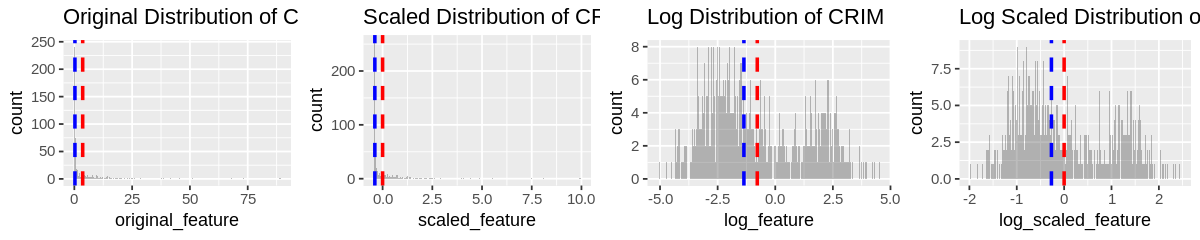

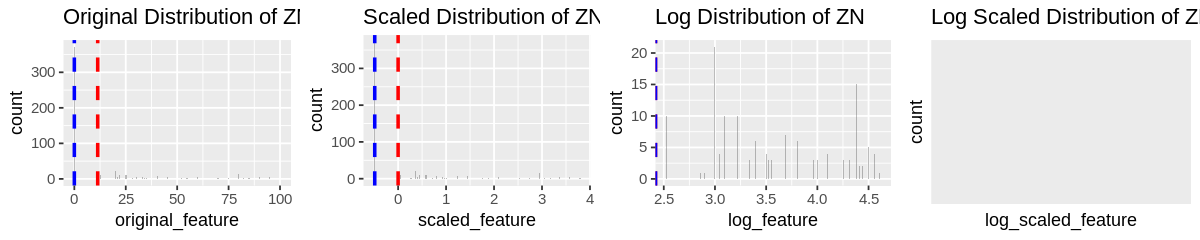

Warning message:
“Removed 471 rows containing non-finite values (stat_bin).”Warning message:
“Removed 506 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1 rows containing missing values (geom_vline).”Warning message:
“Removed 1 rows containing missing values (geom_vline).”

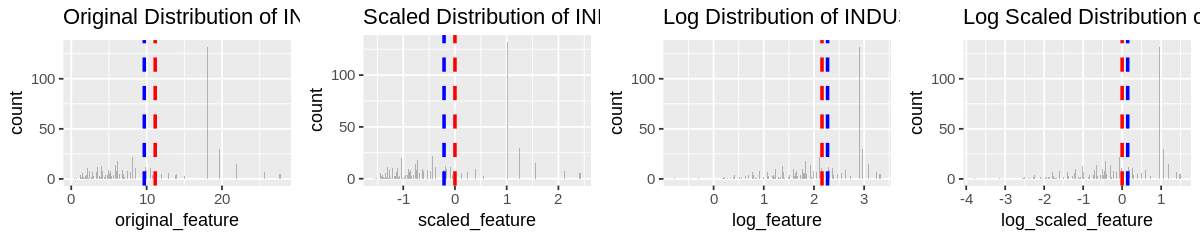

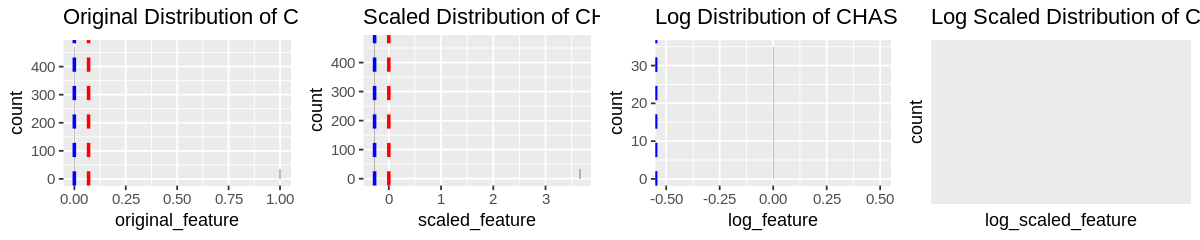

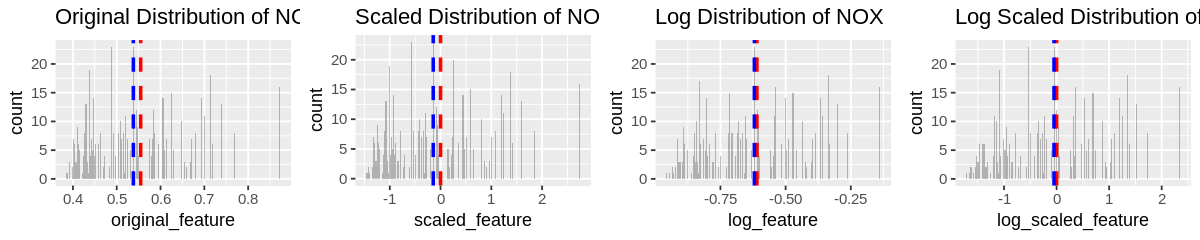

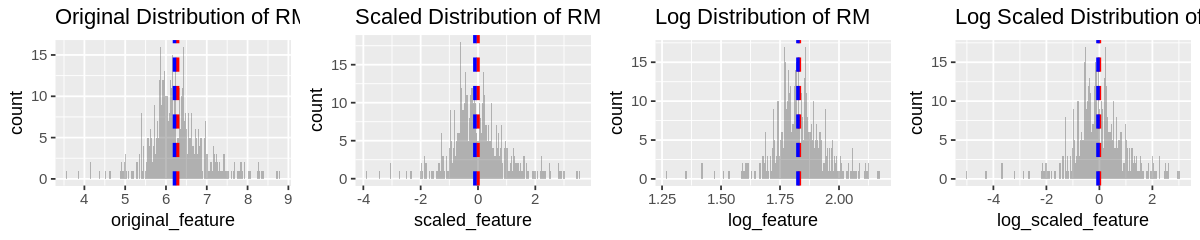

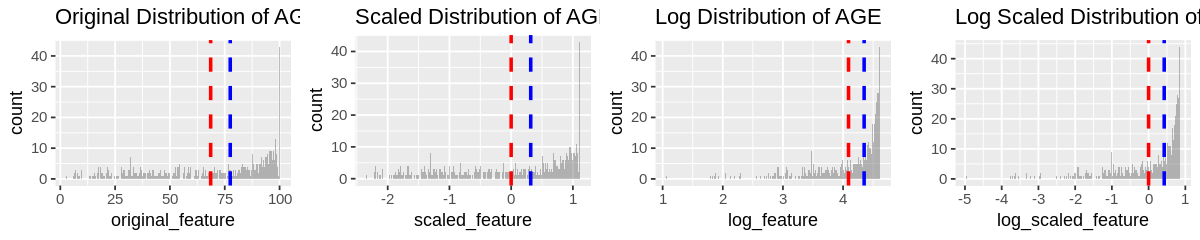

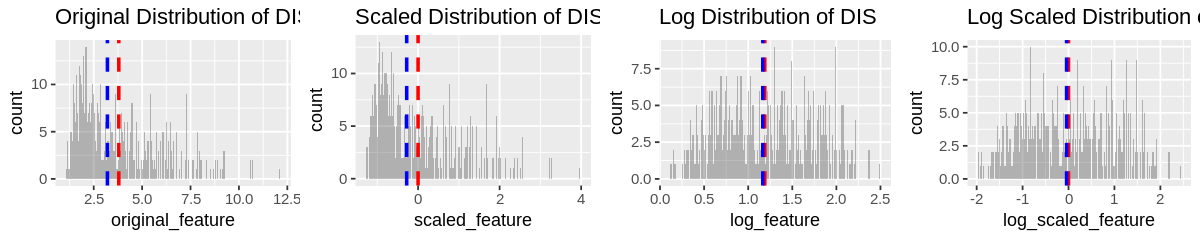

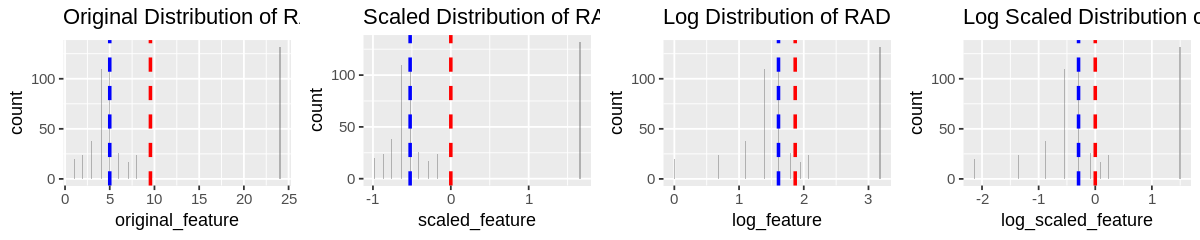

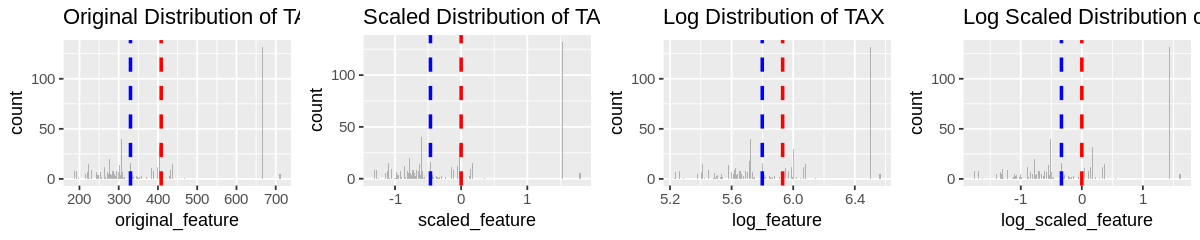

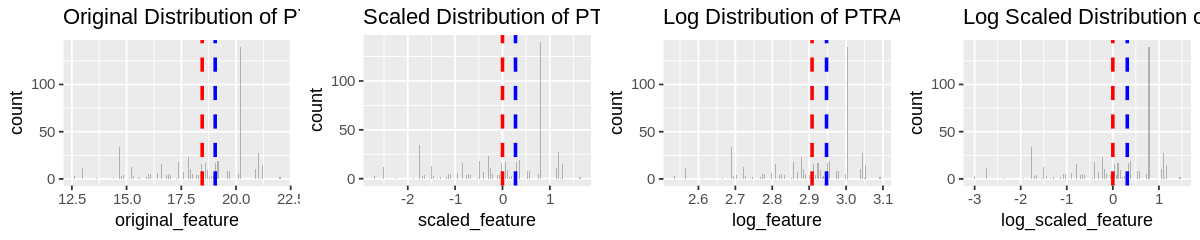

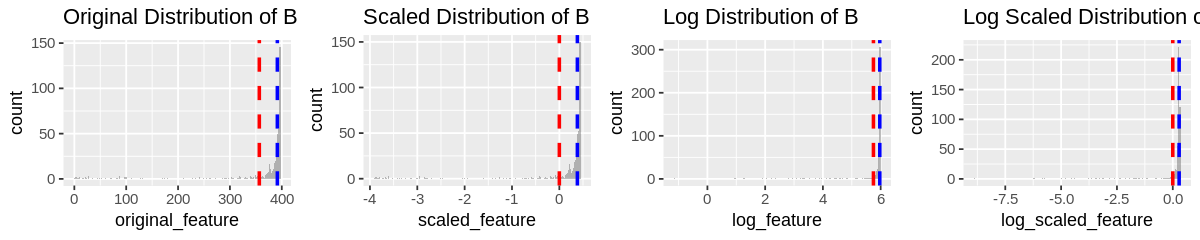

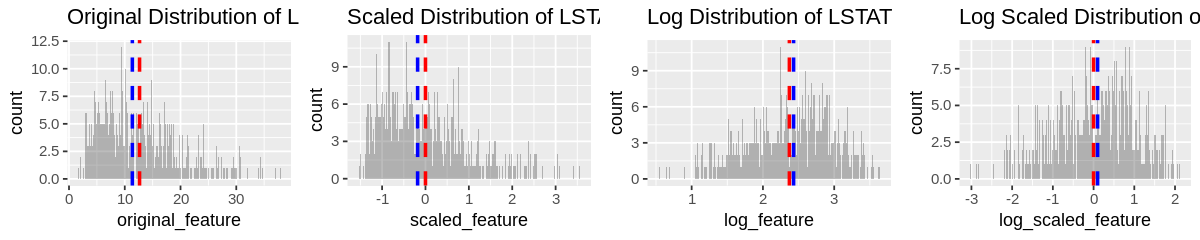

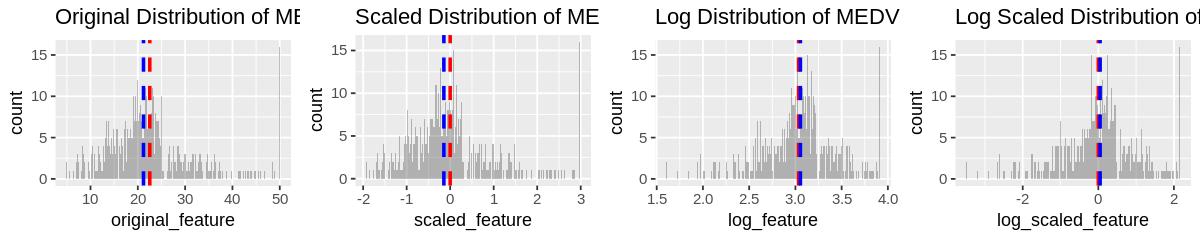

In [40]:
original_v_scaled_v_log('CRIM')
original_v_scaled_v_log('ZN')
original_v_scaled_v_log('INDUS')
original_v_scaled_v_log('CHAS')
original_v_scaled_v_log('NOX')
original_v_scaled_v_log('RM')
original_v_scaled_v_log('AGE')
original_v_scaled_v_log('DIS')
original_v_scaled_v_log('RAD')
original_v_scaled_v_log('TAX')
original_v_scaled_v_log('PTRATIO')
original_v_scaled_v_log('B')
original_v_scaled_v_log('LSTAT')
original_v_scaled_v_log('MEDV')

**discuss how the plots show the transformation that's been applied.**
WE use the log method to deskew our data, this is the transformation ,for the plot, we can see that
the log features always have better distributions than the orginial features.